In [1]:
import NotebookImport
from Read_HIV_Data import *

importing IPython notebook from Read_HIV_Data

importing IPython notebook from Setup/Imports

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", context="paper", font_scale=1.5)

In [3]:
pts = duration.index

In [4]:
hiv = (duration.ix[pts] == 'Control').map({True: 'HIV-', False:'HIV+'})
hiv.name = ''

In [5]:
hiv.value_counts()

HIV+    137
HIV-     42
dtype: int64

In [6]:
duration_m = clinical['estimated duration hiv (months)']
duration_m = duration_m.ix[pts].dropna()
stage = clinical['CDC stage'].ix[pts].dropna()

Here we are going to replace the less common regiments with 'other'

In [7]:
regimen = clinical['Regimen Type'].ix[pts].dropna()
print regimen.value_counts()
regimen = regimen[regimen.map(regimen.value_counts()) > 10]
regimen = regimen.ix[pts].fillna('Other')
regimen = regimen.str.replace(' Based','')
regimen = regimen.ix[ti(duration != 'Control')]

PI/NRTI Based       68
NNRTI/NRTI Based    42
3-class             22
NRTI Based           2
NNRTI Based          1
4+ class             1
PI Based             1
dtype: int64


In [8]:
regimen.value_counts()

PI/NRTI       68
NNRTI/NRTI    42
3-class       22
Other          5
dtype: int64

In [9]:
adherence = clinical['adherence %'].ix[pts].dropna()

In [10]:
paofi = clinical['paofi total'].ix[pts].dropna()
beck = clinical['beck total'].ix[pts].dropna()
iadl = clinical.IADL.ix[pts].dropna()
age.name = 'Age (years)'
bmi.name = 'BMI'

In [11]:
control_color = (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
hiv_color = (0.3333333333333333, 0.6588235294117647, 0.40784313725490196)

In [24]:
sns.set_style(rc={'font.family': 'sans-serif', 'font.sans-serif': ['Arial'],
                  'font.size': 14})

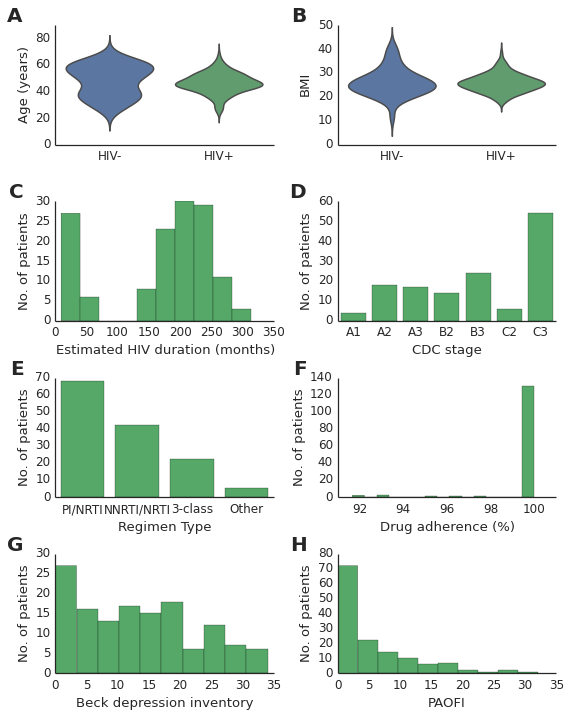

In [25]:
fig, axs = subplots(4,2, figsize=(8, 10))
sns.violinplot(age, hiv,  inner='None', ax=axs[0][0],
               order=['HIV-','HIV+'])
axs[0][0].set_yticks([0,20,40,60,80])

sns.violinplot(bmi, hiv,  inner='None', ax=axs[0][1],
               order=['HIV-','HIV+'])

duration_m.hist(ax=axs[1][0], color=hiv_color)
axs[1][0].set_xlabel('Estimated HIV duration (months)')
sns.barplot(stage.dropna(), ax=axs[1][1], color=hiv_color)
o = [u'PI/NRTI', u'NNRTI/NRTI', u'3-class','Other']
sns.barplot(regimen, ax=axs[2][0], x_order=o, color=hiv_color)
adherence.dropna().hist(ax=axs[2][1], color=hiv_color, bins=15)
axs[2][1].set_xlabel('Drug adherence (%)')

beck.dropna().hist(ax=axs[3][0], color=hiv_color)
axs[3][0].set_xlabel('Beck depression inventory')

paofi.dropna().hist(ax=axs[3][1], color=hiv_color)
axs[3][1].set_xlabel('PAOFI')

letters = list(map(chr, range(97, 123)))[:8] 
for i,ax in enumerate(axs.flatten()):
    ax.text(-0.15, 1.15, letters[i].upper(), transform=ax.transAxes,
            fontsize=20, fontweight='bold', va='top', ha='right')
    if i > 1:
        ax.set_ylabel('No. of patients')
    prettify_ax(ax)
fig.tight_layout()
fig.savefig(FIGDIR + 'sup_clinical_params.pdf')

* LLQ: limit of HIV rna quantification 
* APRI: liver disease progression (AST to Platelet Ratio Index)

In [19]:
pd.crosstab(labs['LLQ PLASMA'], duration)

col_0,HIV Long,HIV Short
LLQ PLASMA,,
<=LLQ,59,27
>LLQ,44,6


In [20]:
fisher_exact_test(duration=='HIV Long', labs['LLQ PLASMA']=='>LLQ')

odds_ratio    3.30
p             0.01
dtype: float64

In [21]:
c = ['LLQ PLASMA', 'PT', 'INR']

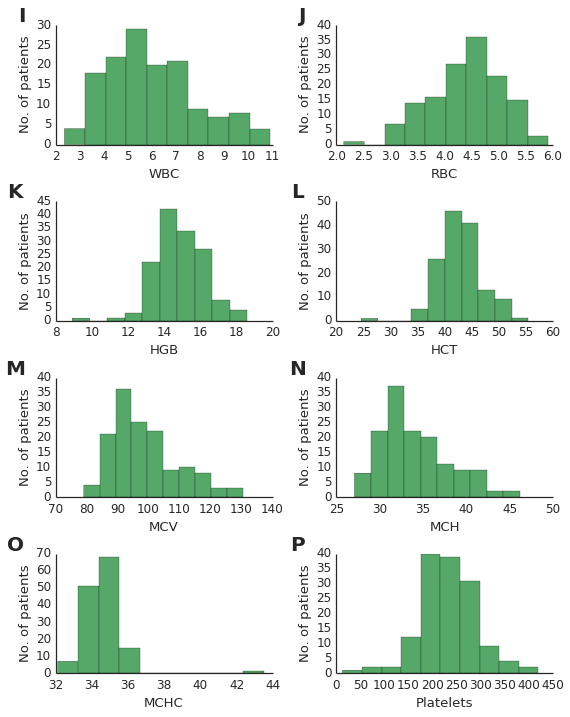

In [23]:
c = ['WBC','RBC','HGB','HCT','MCV','MCH','MCHC','Platelets']
fig, axs = subplots(4,2, figsize=(8,10))
axs = axs.flatten()
for i,b in enumerate(c):
    labs[b].hist(ax=axs[i], color=hiv_color)
    axs[i].set_xlabel(b)
    axs[i].set_ylabel('No. of patients')
    prettify_ax(axs[i])

letters = list(map(chr, range(97, 123)))[8:] 
for i,ax in enumerate(axs.flatten()):
    ax.text(-0.15, 1.15, letters[i].upper(), transform=ax.transAxes,
            fontsize=20, fontweight='bold', va='top', ha='right')
    prettify_ax(ax)
fig.tight_layout()
fig.savefig(FIGDIR + 'sup_clinical_blood.pdf')